# Graph-based image processing and analysis
**Master 2 GeoData Science**


## Introduction
The purpose of this lab is to experiment some graph-based tools for image processing that have been seen in Lecture (part 1). For this lab, we will work with the **Scikit-image** library.

Before starting, let mount your drive to allow Colab to acess to your Google Drive (for e.g., reading/writing images)

### **Exo 1: Compute the Adjacency matrix, Degree matrix and Laplacian Matrix from a given graph**

Read and show the *graph_exe.png* image from your Drive as follows:

/var/folders/zw/hnw6kqc132g470mk8rsyp5400000gn/T/ipykernel_3793/3320873816.py:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img)


Text(0.5, 1.0, 'A weighted graph')

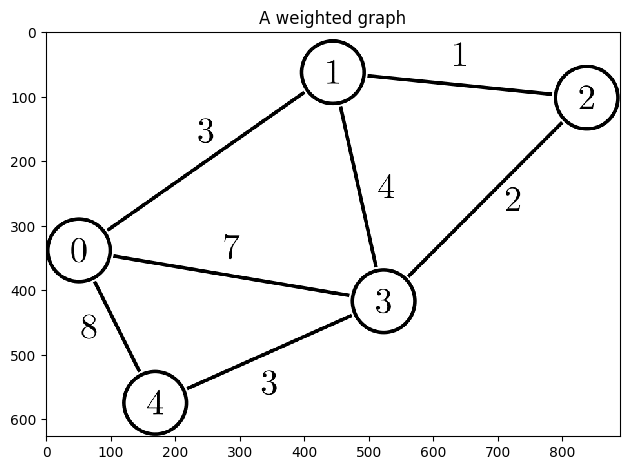

In [1]:
from skimage import io
import matplotlib.pyplot as plt


img = io.imread('graph_exe.png')
plt.figure(0)
io.imshow(img)
plt.title('A weighted graph')


1) Implement the adjacency matrix (W) using *numpy.array*




In [5]:
import numpy as np


n_nodes = 5
## node 1, node 2 , weight
edges = [(0, 1, 3), (0, 3, 7), (0, 4, 8),(1,2,1), (1,3,4), (2,3,2), (3,4,3)]

W = np.zeros((n_nodes, n_nodes)) ## 5x5 zero matrix

for u, v, w in edges:
    W[u, v] = w
    W[v, u] = w  ## undirected graph

print(W)

# W = np.array()
# print(W)


[[0. 3. 0. 7. 8.]
 [3. 0. 1. 4. 0.]
 [0. 1. 0. 2. 0.]
 [7. 4. 2. 0. 3.]
 [8. 0. 0. 3. 0.]]


2) Now compute the Degree matrix (D) and the Laplacian matrix (L) from W

In [6]:
# Degree matrix D

degrees = np.sum(W, axis=1)  ## sum along rows
D = np.diag(degrees)  ## create a diagonal matrix

print(D)

# print(D)

[[18.  0.  0.  0.  0.]
 [ 0.  8.  0.  0.  0.]
 [ 0.  0.  3.  0.  0.]
 [ 0.  0.  0. 16.  0.]
 [ 0.  0.  0.  0. 11.]]


In [7]:
# Laplacian matrix L


## laplacian matrix L
L = D - W
print ('\n##### Laplacian matrix L######')
print(L)


# print(L)


##### Laplacian matrix L######
[[18. -3.  0. -7. -8.]
 [-3.  8. -1. -4.  0.]
 [ 0. -1.  3. -2.  0.]
 [-7. -4. -2. 16. -3.]
 [-8.  0.  0. -3. 11.]]


### **Exo 2: Contruct a regular graph from an image**

Read and visualize the two following images
- img1: the *coffee* image from skimage data (need to import data package)
- img2: the *intersection94.jpg* image from your Drive


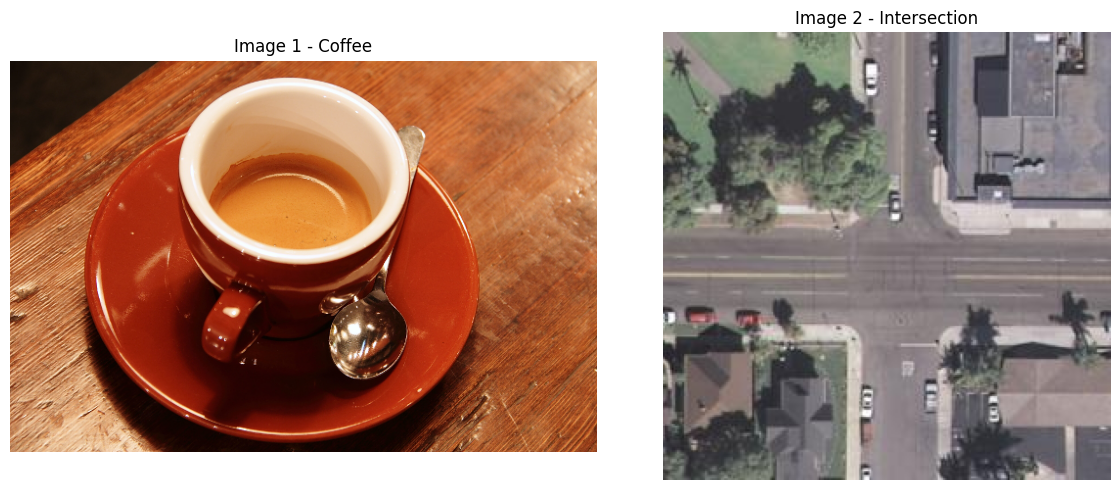

In [8]:
# Read img1 and img2
from skimage import data

img1 = data.coffee()
img2 = io.imread('intersection94.jpg')


# Create figure with 1 row and 2 columns
plt.figure(figsize=(12, 5))

# Subplot 1
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Image 1 - Coffee')
plt.axis('off')

# Subplot 2
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Image 2 - Intersection')
plt.axis('off')

plt.tight_layout()
plt.show()




### Now, imagine we would like to construct a regular graph (4-connected) on each of the images (named *G1* and *G2*)

### 1) What are the number of nodes? number of edges of a graph contructed from an image of size NxM ?


In [9]:
img1.shape

(400, 600, 3)

In [10]:

img2.shape

(256, 256, 3)

In [11]:
# your answer
## ewgular groah 4-connected means 4-neighborhoods for each pixel
## for img1 coffe shape is NxMxC >>> 400x600x3
## so number of nodes in the graph  = N x M = 400 x 600
## and number of edges  = 4 x N x M = 4 x 400 x 600
N, M, C = img1.shape
edges = []

for r in range(N):
    for c in range(M):
        u = r*M + c     # current pixel node

        # right neighbor
        if c + 1 < M:
            v = r*M + (c+1)
            edges.append((u, v))

        # down neighbor
        if r + 1 < N:
            v = (r+1)*M + c
            edges.append((u, v))
print(f'Number of nodes: {N*M}')
print(f'Number of edges: {len(edges)}')



Number of nodes: 240000
Number of edges: 479000


In [12]:
deg = np.zeros(N*M)

for (u, v) in edges:
    deg[u] += 1
    deg[v] += 1

print(deg[200*600 + 300])  # degree of pixel at (200, 300)


4.0


In [13]:
D = np.diag(deg)
print(D)

[[2. 0. 0. ... 0. 0. 0.]
 [0. 3. 0. ... 0. 0. 0.]
 [0. 0. 3. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 3. 0. 0.]
 [0. 0. 0. ... 0. 3. 0.]
 [0. 0. 0. ... 0. 0. 2.]]


In [14]:
## laplacian matrix L
# L = D - deg
# print ('\n##### Laplacian matrix L######')
# print(L)

#### KERNEL DIED####


2) Calculate the number of nodes and number of edges of G1 and G2.

In [15]:
# your answer
## G2
N, M, C = img2.shape
edges = []

for r in range(N):
    for c in range(M):
        u = r*M + c     # current pixel node

        # right neighbor
        if c + 1 < M:
            v = r*M + (c+1)
            edges.append((u, v))

        # down neighbor
        if r + 1 < N:
            v = (r+1)*M + c
            edges.append((u, v))
print(f'Number of nodes: {N*M}')
print(f'Number of edges: {len(edges)}')


Number of nodes: 65536
Number of edges: 130560


#### Plotting graph for patches of pixels

In [17]:
r_start, r_end = 50, 70   # rows 50 to 69
c_start, c_end = 100, 120 # cols 100 to 119

patch = img1[r_start:r_end, c_start:c_end]
N_patch, M_patch = patch.shape[:2]


### graph for only 20x20 pixels patch
edges = []

for r in range(N_patch):
    for c in range(M_patch):
        u = r*M_patch + c
        
        # right neighbor
        if c + 1 < M_patch:
            v = r*M_patch + (c+1)
            edges.append((u,v))
        
        # down neighbor
        if r + 1 < N_patch:
            v = (r+1)*M_patch + c
            edges.append((u,v))
print(f'Number of nodes in patch: {N_patch*M_patch}')
print(f'Number of edges in patch: {len(edges)}')

Number of nodes in patch: 400
Number of edges in patch: 760


In [18]:
import numpy as np

W = np.zeros((N_patch*M_patch, N_patch*M_patch))

for u,v in edges:
    W[u,v] = 1
    W[v,u] = 1  # undirected

deg = np.sum(W, axis=1)
D = np.diag(deg)

L = D - W



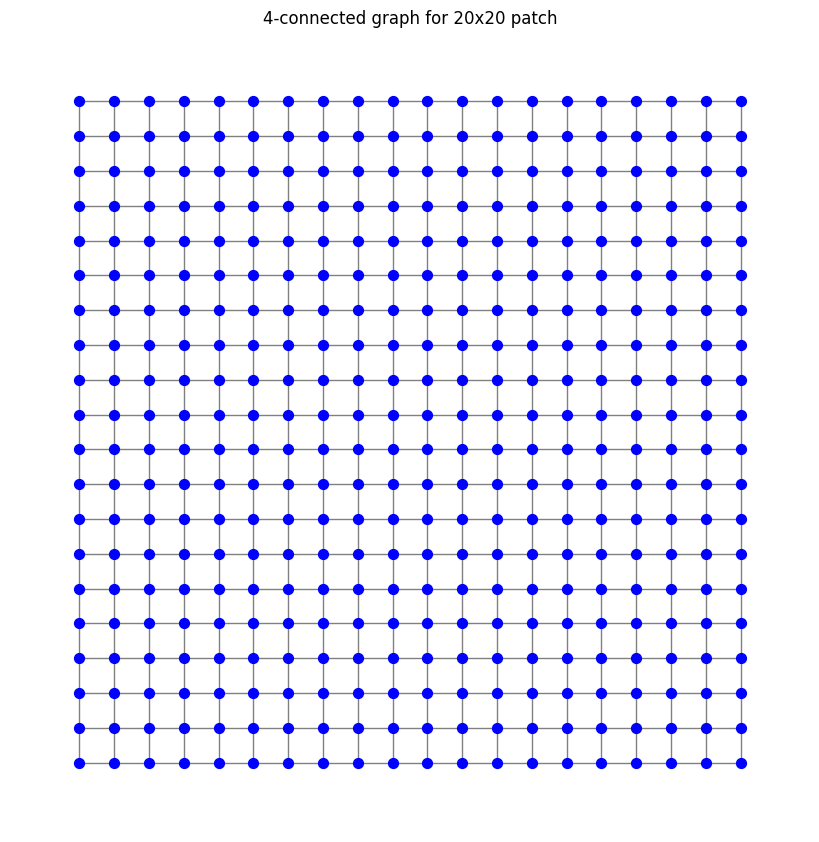

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from(edges)

# Compute positions: pixel coordinates
pos = {r*M_patch + c: (c, -r)  # invert y-axis for correct orientation
       for r in range(N_patch)
       for c in range(M_patch)}

plt.figure(figsize=(8,8))
nx.draw(G, pos=pos, node_size=50, node_color='blue', edge_color='gray')
plt.title('4-connected graph for 20x20 patch')
plt.show()


### **Exo 3: Now we would like to construct a region adjacency graph (RAG) from superpixels. Let's follow the tutorial.**

1) Perform SLIC super-pixel segmentation using the *segmentation.slic* method with parameters
- compactness 20
- number of segments 400

Required packages: *segmentation, color*

In [20]:
# Generate super-pixels

from skimage import segmentation, color

# labels_sp1 from img1
labels_sp1 = segmentation.slic(img1, n_segments=400, compactness=20)

# labels_sp2 from img2
labels_sp2 = segmentation.slic(img2, n_segments=400, compactness=20)



Print the number of super-pixels from each one using *np.unique*


In [24]:
# Print the number of super-pixels using np.unique
num_superpixels_img1 = len(np.unique(labels_sp1))
print(f'Number of super-pixels in Image 1 coffe: {num_superpixels_img1}')


# Print the number of super-pixels using np.unique
num_superpixels_img2 = len(np.unique(labels_sp2))
print(f'Number of super-pixels in Image 2 intersection: {num_superpixels_img2}')


Number of super-pixels in Image 1 coffe: 395
Number of super-pixels in Image 2 intersection: 381


#### more segements or regions fpr images 1 as the shape is 400,600 while for image 2 it's reversed.

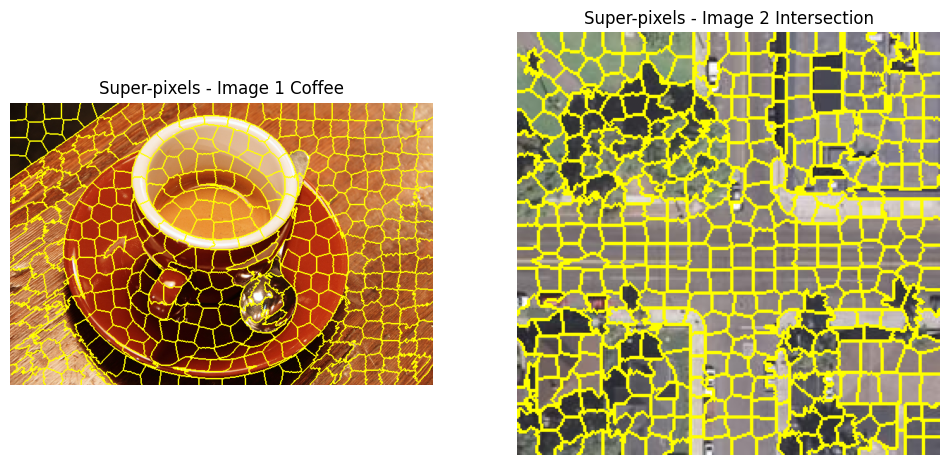

In [25]:
# visualize the super-pixels with *segmentation.mark_boundaries* and *color.label2rgb*

from skimage import segmentation, color

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(segmentation.mark_boundaries(img1, labels_sp1))
ax[0].set_title('Super-pixels - Image 1 Coffee')
ax[0].axis('off')
ax[1].imshow(segmentation.mark_boundaries(img2, labels_sp2))
ax[1].set_title('Super-pixels - Image 2 Intersection')
ax[1].axis('off')
plt.show()

2) Construct a RAG based on the super-pixels using the *graph.rag_mean_color* method

Required packages: *graph*

In [75]:
# Graph construction from super-pixels
from skimage import graph, color, segmentation

# rag1 =
rag1 = graph.rag_mean_color(img1, labels_sp1, mode='distance')
rag2 = graph.rag_mean_color(img2, labels_sp2, mode='distance')

print(f'number of nodes for Image1 {rag1}')
print(f'number of nodes for Image2 {rag2}')

number of nodes for Image1 RAG with 395 nodes and 1110 edges
number of nodes for Image2 RAG with 381 nodes and 1087 edges


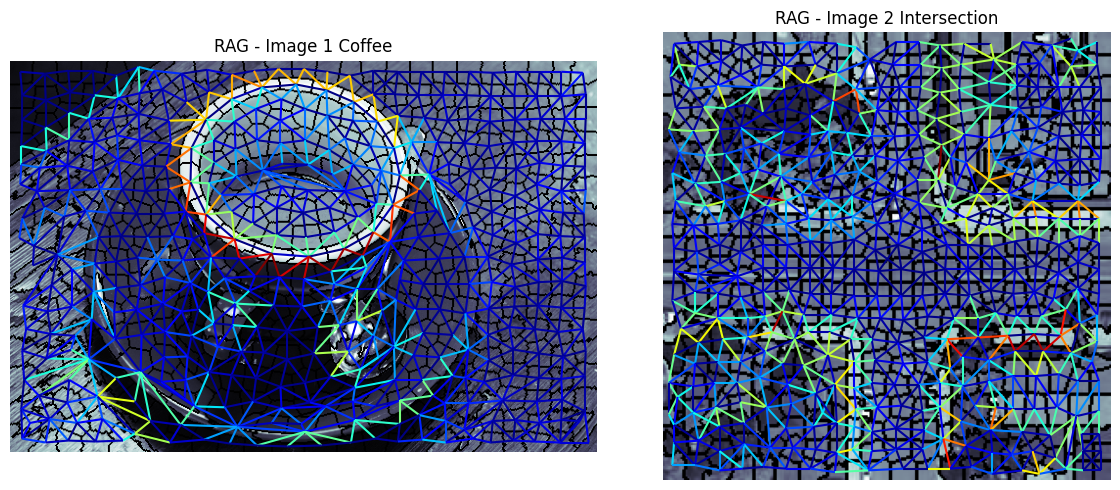

In [38]:
# Create figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1 - Image 1
graph.show_rag(labels_sp1, rag1, img1, ax=axes[0], edge_cmap=plt.cm.jet)
axes[0].set_title('RAG - Image 1 Coffee')
axes[0].axis('off')

# Subplot 2 - Image 2
graph.show_rag(labels_sp2, rag2, img2, ax=axes[1], edge_cmap=plt.cm.jet)
axes[1].set_title('RAG - Image 2 Intersection')
axes[1].axis('off')

plt.tight_layout()
plt.show()

3) Perform Graph-cut algorithm (Normalized Cut) from the constructed graph using the *graph.cut_normalized* method

In [ ]:
# Perform graph-cut

labels_gcut1 = graph.cut_normalized(labels_sp1, rag1, thresh= 0.30)
labels_gcut2 = graph.cut_normalized(labels_sp2, rag2, thresh= 0.30)

# print('Graph cut img1', labels_gcut1)
# print('Graph cut img2', labels_gcut2)

# number of segments after graph cut
num_segments_gcut1 = len(np.unique(labels_gcut1))
print(f'Number of segments after graph cut - Image 1 Coffee: {num_segments_gcut1}')

num_segments_gcut2 = len(np.unique(labels_gcut2))
print(f'Number of segments after graph cut - Image 2 Intersection: {num_segments_gcut2}')




Number of segments after graph cut - Image 1 Coffee: 43
Number of segments after graph cut - Image 2 Intersection: 40


Visualize the segmentation results

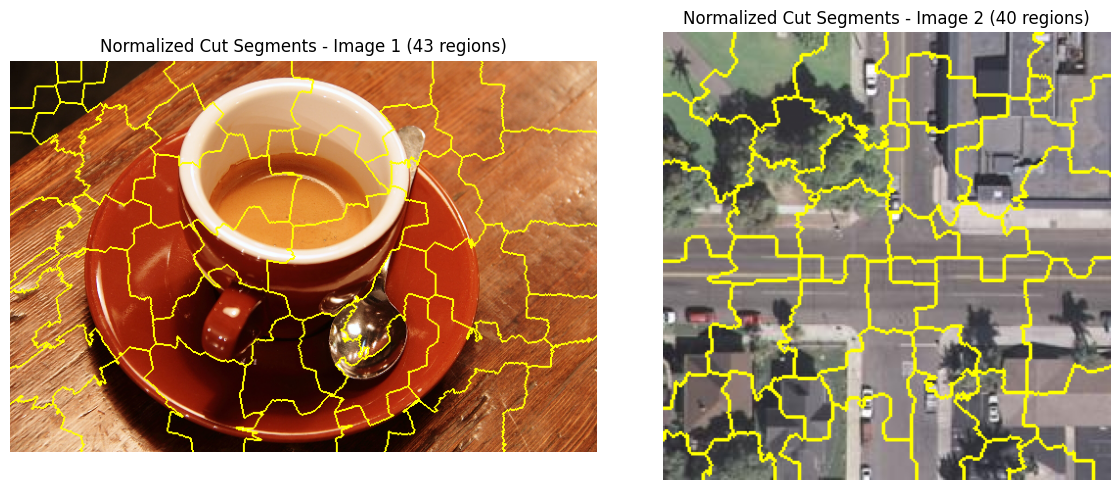

In [53]:
# visualization the segmentation results
from skimage.segmentation import mark_boundaries

plt.figure(figsize=(12, 5))

# Image 1
plt.subplot(1,2,1)
plt.imshow(mark_boundaries(img1, labels_gcut1))
plt.title(f'Normalized Cut Segments - Image 1 ({num_segments_gcut1} regions)')
plt.axis('off')

# Image 2
plt.subplot(1,2,2)
plt.imshow(mark_boundaries(img2, labels_gcut2))
plt.title(f'Normalized Cut Segments - Image 2 ({num_segments_gcut2} regions)')
plt.axis('off')

plt.tight_layout()
plt.show()


# What are the number of segments from each segmented image?

## your response
one segment in first experiment with default threshold 0.001 because all superpixels are similar in color and texture so the graph cut groups them into one segment. In the second experiment, with a higher threshold of 0.3, the algorithm is more sensitive to differences between superpixels, resulting in multiple segments being formed. This shows how the choice of threshold can significantly impact the segmentation outcome based on the characteristics of the image.



Text(0.5, 1.0, 'Segmented image (normalized cut)')

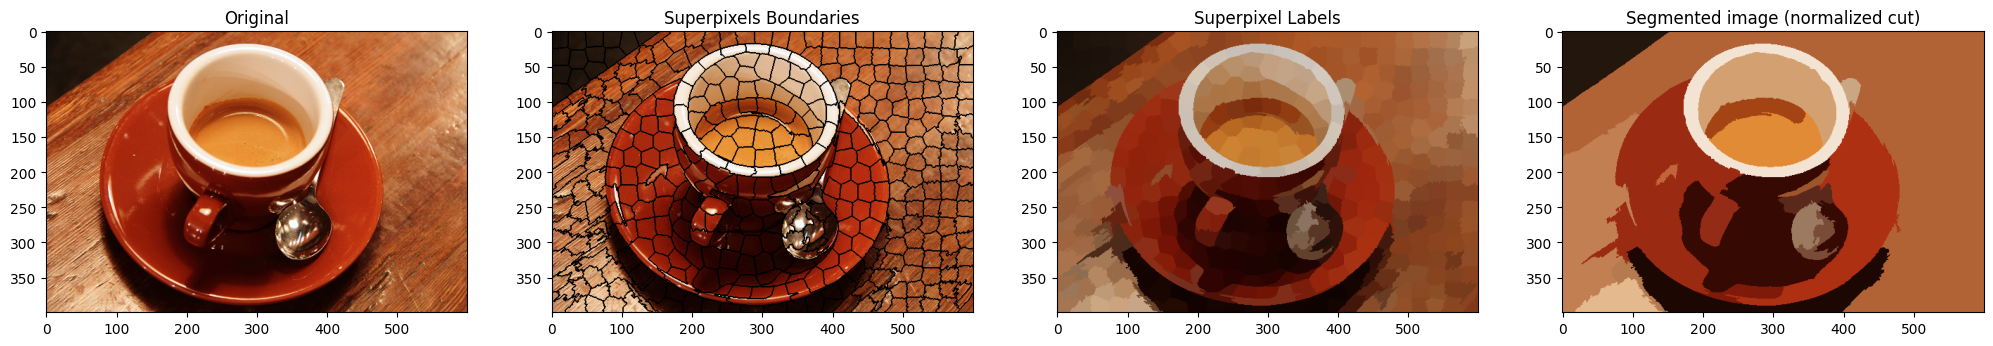

In [71]:
from skimage.util import img_as_ubyte, img_as_float, img_as_uint, img_as_float64

## previous 20, 400

image = data.coffee()
compactness=20
n_segments=400
labels = segmentation.slic(image, compactness=compactness, n_segments=n_segments, enforce_connectivity=True)
image_with_boundaries = segmentation.mark_boundaries(image, labels, color=(0, 0, 0))
image_with_boundaries = img_as_ubyte(image_with_boundaries)
pixel_labels = color.label2rgb(labels, image_with_boundaries, kind='avg', bg_label=0)


# using the labels found with the superpixeled image
# compute the Region Adjacency Graph using mean colors
g = graph.rag_mean_color(image, labels, mode='similarity')

# perform Normalized Graph cut on the Region Adjacency Graph
labels2 = graph.cut_normalized(labels, g)
segmented_image = color.label2rgb(labels2, image, kind='avg')


f, axarr = plt.subplots(nrows=1, ncols=4, figsize=(25, 20))

axarr[0].imshow(image)
axarr[0].set_title("Original")

#plot boundaries
axarr[1].imshow(image_with_boundaries)
axarr[1].set_title("Superpixels Boundaries")

#plot labels
axarr[2].imshow(pixel_labels)
axarr[2].set_title('Superpixel Labels')

#compute segmentation
axarr[3].imshow(segmented_image)
axarr[3].set_title('Segmented image (normalized cut)')

Text(0.5, 1.0, 'Segmented image (normalized cut)')

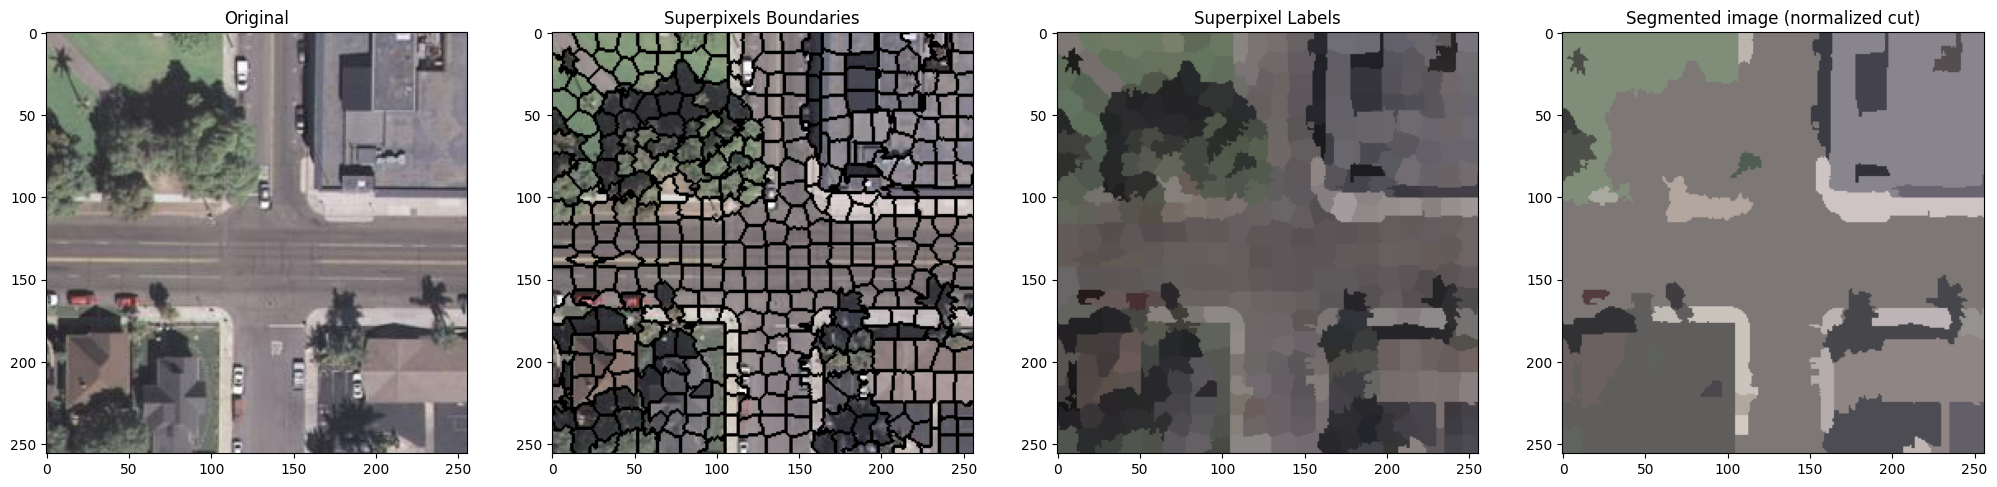

In [72]:


from skimage.util import img_as_ubyte, img_as_float, img_as_uint, img_as_float64

## previous 20, 400

image2 = io.imread('intersection94.jpg')
compactness=20
n_segments=400
labels = segmentation.slic(image2, compactness=compactness, n_segments=n_segments, enforce_connectivity=True)
image_with_boundaries = segmentation.mark_boundaries(image2, labels, color=(0, 0, 0))
image_with_boundaries = img_as_ubyte(image_with_boundaries)
pixel_labels = color.label2rgb(labels, image_with_boundaries, kind='avg', bg_label=0)


# using the labels found with the superpixeled image
# compute the Region Adjacency Graph using mean colors
g = graph.rag_mean_color(image2, labels, mode='similarity')

# perform Normalized Graph cut on the Region Adjacency Graph
labels2 = graph.cut_normalized(labels, g)
segmented_image = color.label2rgb(labels2, image2, kind='avg')


f, axarr = plt.subplots(nrows=1, ncols=4, figsize=(25, 20))

axarr[0].imshow(image2)
axarr[0].set_title("Original")

#plot boundaries
axarr[1].imshow(image_with_boundaries)
axarr[1].set_title("Superpixels Boundaries")

#plot labels
axarr[2].imshow(pixel_labels)
axarr[2].set_title('Superpixel Labels')

#compute segmentation
axarr[3].imshow(segmented_image)
axarr[3].set_title('Segmented image (normalized cut)')

# Draft

In [ ]:
from skimage import data, segmentation, color
from skimage import graph
from matplotlib import pyplot as plt


im = data.astronaut()

labels1 = segmentation.slic(im, compactness=30, n_segments=400, start_label=1)
out1 = color.label2rgb(labels1, im, kind='avg', bg_label=0)

g = graph.rag_mean_color(im, labels1, mode='similarity')

labels2 = graph.cut_normalized(labels1, g)
out2 = color.label2rgb(labels2, im, kind='avg', bg_label=0)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()

In [ ]:
# Perform graph-cut


out1 = color.label2rgb(labels_sp1, img1, kind='avg', bg_label=0)
labels_gcut1 = graph.cut_normalized(labels_sp1, rag1, thresh=0.5)
out2 = color.label2rgb(labels_gcut1, img1, kind='avg', bg_label=0)

# out
# labels_gcut2 = graph.cut_normalized(labels_sp2, rag2)

# print('Graph cut img1', labels_gcut1)
# print('Graph cut img2', labels_gcut2)

# number of segments after graph cut
num_segments_gcut1 = len(np.unique(labels_gcut1))
print(f'Number of segments after graph cut - Image 1 Coffee: {num_segments_gcut1}')

# num_segments_gcut2 = len(np.unique(labels_gcut2))
# print(f'Number of segments after graph cut - Image 2 Intersection: {num_segments_gcut2}')

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()
